<a href="https://colab.research.google.com/github/rita-milani/data_science_na_pratica/blob/master/Analyzing_Airbnb_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis - Singapore

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

This is a preliminary exercise with the aim to do basic analysis of Singaporean guest housing market with basis on Airbnb statistical database using **Python** libraries. 

[Airbnb](https://www.airbnb.com) is regarded as one of the **greatest** hotel concerns in the world, **despite of not owning a single hotel unit.**

The main idea behind the business is to connect millions of travelers around the world directly to potential hosts, enabling a greater diversity of accomodations such as houses, apartments and  rooms, at flexible dates and prices. 

After 10 years operational using an ever innovative platform, Airbnb hosted **more than 300 million guests worldwide**, competing with the main hotel chains. According to [Airbnb & Hotel Performance](http://www.necstour.eu/sites/default/files/STR_AirbnbHotelPerformance.pdf), a study performed by STR Consulting, in 2016, Airbnb accounted for 3 million online listings, while Marriott International, the biggest company, had 1.1 million rooms.

**In this notebook, we will use Airbnb figures to gather basic exploratory data in order to better understand the Singaporean market.**

## Singapore

Why Singapore? 


<center><img alt="singaporean_skyline" width=50% src="https://www.paradisecruise.com/blog/wp-content/uploads/2018/11/singapore.jpg"></center>

A [Forbes](https://www.forbes.com/sites/alexcapri/2018/09/21/5-reasons-why-the-worlds-tech-firms-are-moving-to-singapore/#6948ed72aa01) report from 2018 lists the city as a **"world class technological hub in Asia"**, as **80% of the top tech firms of the world** have operation in the city. 

Factors such as rule of law, transparent institutions, bi-lateral free trade agreements (FTA), qualified human capital, corporate laws based on Western framework make the country a **safe haven for Western and Chinese companies in times of trade uncertainties**. 

As a result, the city was ranked as the **sixth in innovation worldwide by Bloomberg Innovation Index** in 2017, against 21st position for China - attracting much of the foreign investment from Chinese tech companies, such as Alibaba. 

The country was also ranked by the World Bank as **first worldwide in ease of doing business** in 2012, and as **most competitive country in the world for doing business** by IMD. 

Finally, the radical educational reform implemented by the city during the last decades granted   **the first position in OECD Global Education Report** in 2015, supplying the job market with qualified workers. 


# Data Collection
All the data was gathered by [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

For a first exploratory data analaysis, the following file will be used:

- `listings.csv` - *Summary information and metrics for listings in Singapore (good for visualizations).*









In [0]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# import listings.csv to a DataFrame
df = pd.read_csv("http://data.insideairbnb.com/singapore/sg/singapore/2019-11-26/visualisations/listings.csv")

# Data Analysis

This step aims to create a first understanding of how data is structured.

## Variables Dictionary

- `id` - generated number to identify the property
- `name` - property ad name
- `host id` - property´s host id number 
- `host_name` - host name
- `neighbourhood_group` - greater area
- `neighbourhood` - neighbourhood name
- `latitude` - property´s latitude coordinate
- `longitude`- property´s longitude coordinate
- `room_type` - room type offered
- `price` - rental price
- `minimum_nights` - minimum rental nights 
- `number_of_reviews`- number of reviews for the property
- `last_review`- date of last review
- `reviews_per_month`- monthly number of reviews  
- `calculated_host_listings_count` - number of properties belonging to the same host
- `availability_365` - property availability in a 365 time period



In [0]:
# checking dataset first entries
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,82,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.26,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,68,6,20,2015-10-01,0.19,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,202,1,15,2019-09-07,0.16,8,352
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,93,1,24,2019-10-13,0.24,8,349


In [0]:
# enlist all the neighbourhood names
df['neighbourhood'].unique()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Newton', 'Geylang', 'River Valley', 'Jurong West', 'Rochor',
       'Queenstown', 'Serangoon', 'Downtown Core', 'Marine Parade',
       'Pasir Ris', 'Toa Payoh', 'Outram', 'Punggol', 'Tanglin',
       'Hougang', 'Novena', 'Bukit Panjang', 'Kallang', 'Singapore River',
       'Orchard', 'Ang Mo Kio', 'Bukit Batok', 'Museum', 'Sembawang',
       'Choa Chu Kang', 'Clementi', 'Jurong East', 'Sengkang', 'Bishan',
       'Central Water Catchment', 'Yishun', 'Mandai', 'Southern Islands',
       'Sungei Kadut', 'Western Water Catchment', 'Tuas', 'Marina South',
       'Lim Chu Kang', 'Paya Lebar'], dtype=object)

### **Q1. How many attributes (variables) and how many entries does the dataset have? What are the variables´ types?**

Let´s identify the amount of entries and variables from our dataset. 

This dataset is the "summarized version" by Airbnb. A more complete version can be found at [Inside Airbnb](http://insideairbnb.com/get-the-data.html) named as `listings.csv.gz`.


In [0]:
# identify DataFrame data amount; [0] denotes the variables, [1] denotes the entries
print("Entries:\t {}".format(df.shape[0]))
print("Variables:\t {}".format(df.shape[1]))
df.shape

Entries:	 7857
Variables:	 16


(7857, 16)

In [0]:
# display variables types
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Which is the share of missing data in this dataset?**

The dataset quality is proportional to the share of missing values. It is relevant to understand if the missing values are significative compared to the total entries.

- 

In [0]:
# find out the share of missing values 
(df.isnull().sum()/df.shape[0])

id                                0.000000
name                              0.000255
host_id                           0.000000
host_name                         0.000509
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.349243
reviews_per_month                 0.349243
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [0]:
# organize the variables according to the missing values in desceding order
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

reviews_per_month                 34.924271
last_review                       34.924271
host_name                          0.050910
name                               0.025455
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

So, it´s possible to conclude that the variables linked to reviews (`reviews_per_month` and `last_review`) have no register in over one third of the entries. Moreover, `host_name`and `name` series have a very small share of absent values, below 1%.

### **Q3. Which distribution types do the variables follow?**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67e9721358>,
      dtype=object)

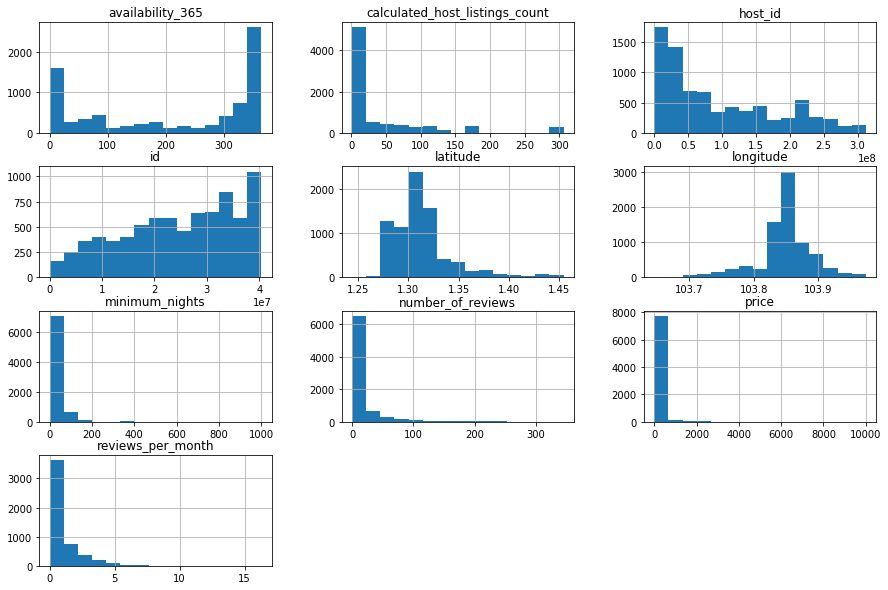

In [0]:
# plot the histograms for the numerical variables
df.hist(bins=15, figsize=(15,10))

### **Q4. Are there any outliers?**

By the histograms distribution, it´s possible to notice the signs of outliers presence. For example, for the variables `price`, `minimum_nights` and `calculated_host_listings_count`.

The values do not follow a specific distribution and result in distorted graphs. There are two ways of detecting outliers:

- Statistical summary using `describe` method
- Plot `boxplots` for the variables




In [0]:
# analyze the statistical summary of variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7857.000000,7857.000000,7857.000000,5113.000000,7857.000000,7857.000000
mean,169.357006,18.448517,13.659412,1.015343,41.751941,209.858725
std,323.896363,45.400413,30.981304,1.303231,69.624059,146.727329
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,66.000000,1.000000,0.000000,0.170000,2.000000,54.000000
50%,120.000000,3.000000,2.000000,0.490000,9.000000,269.000000
75%,198.000000,14.000000,11.000000,1.300000,50.000000,355.000000
max,10000.000000,1000.000000,345.000000,16.290000,306.000000,365.000000


Taking a look at the statistical review above, it´s possile to notice some inconsistencies:

- The `price` variable has a high standard deviation, well above the mean. 75% of its values lie below 198, but its maximum value peaks 10.000.

- A similar pattern may be identified in the `minimum_nights` series with a maximum value sigificantly above the 75% of the results.

- We can also observe that the series linked to the reviews and listings have a similar pattern, but for exercise purposes, we will focus on `price` and `minimum_nights` variables.

###Boxplot for minimum_nights

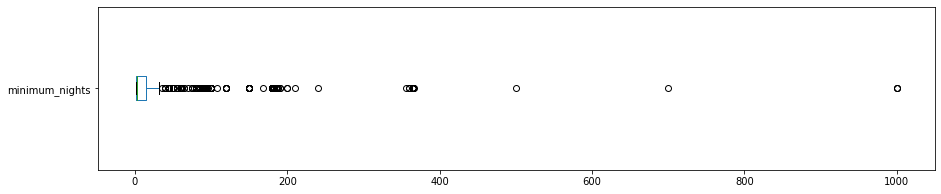

minimum_nights - values above 30 nights:
869 entries
11.06%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# amount of values above 30 nights
print("minimum_nights - values above 30 nights:")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.2f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot for price

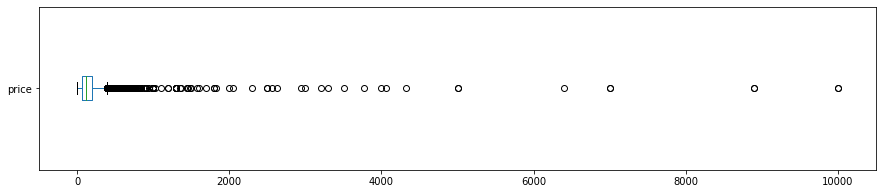


price: values above 900
57 entries
0.7255%


In [0]:
# price
df.price.plot(kind = 'box', vert=False, figsize=(15,3))
plt.show()

# values above 900 for price
print("\nprice: values above 900")
print("{} entries".format(len(df[df.price > 900])))
print("{:.4f}%".format((len(df[df.price > 900]) / df.shape[0])*100))


### Histogram without outliers

As we identified outliers at `price` and `minimum_nights`, let´s clean the DataFrame and plot again the histograms:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67e793f9e8>,
      dtype=object)

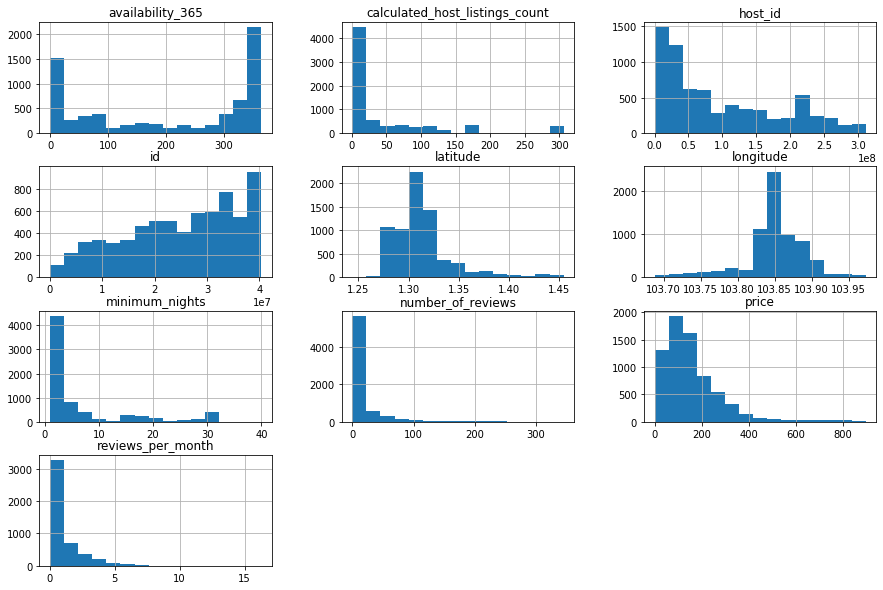

In [0]:
# create a new DataFrame removing the outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 900].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 40].index, axis=0, inplace=True)

# plot the histogram for numerical variables
df_clean.hist(bins=15, figsize=(15,10))

We can observe that, after the removal of outliers, the graphs for `price` and `minimum_nights` get a smoother shape.

### **Q4. What´s the correlation among the variables?**

Basically spoken, correlation means that there is a relationship (although not a causality) between two series. At our context, we will search for a relation among the enlisted variables. 

This relationship can be measured, and the coefficient reveals the intensity of the link. To identify the existing correlations, we will use two tools:

- Create a correlation matrix using the numerical variables
- Generate a heatmap from this matrix, using `seaborn` library

In [0]:
# generate a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count','availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.004647,-0.067956,0.021252,0.112968,0.163589
minimum_nights,0.004647,1.000000,-0.150347,-0.208781,0.544583,0.187912
number_of_reviews,-0.067956,-0.150347,1.000000,0.649047,-0.158225,-0.057217
reviews_per_month,0.021252,-0.208781,0.649047,1.000000,-0.216396,-0.084492
calculated_host_listings_count,0.112968,0.544583,-0.158225,-0.216396,1.000000,0.256008
availability_365,0.163589,0.187912,-0.057217,-0.084492,0.256008,1.000000


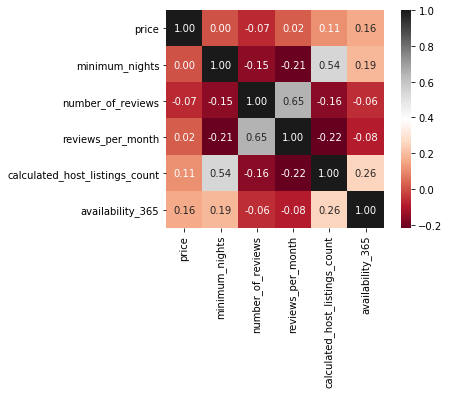

In [0]:
# generate a heatmap
sns.heatmap(corr, cmap='RdGy', fmt='.2f', square=True, linecolor='white', annot=True)

As the numerical variables are more related to reviews, it is expected that they present a weak correlation among themselves, mainly if compared to price variable.

### **Q5. What is the most rented property?**

The property type is identified through the `room_type` colum. If you already rented a property through the website, you know you can rent entire homes and apartments, private rooms, hotel rooms or even shared rooms. 

Here we count the number of properties using `value_counts()` method.


In [0]:
# show the amount of properties available by type
df_clean.room_type.value_counts() 

Entire home/apt    3395
Private room       2725
Hotel room          627
Shared room         204
Name: room_type, dtype: int64

In [0]:
# show the share of properties by type
(df_clean.room_type.value_counts()/df_clean.shape[0])*100

Entire home/apt    48.841893
Private room       39.202992
Hotel room          9.020285
Shared room         2.934830
Name: room_type, dtype: float64

It is possible to observe that, in Singapore, almost half of the Airbnb ads are related to entire properties (48,8%), followed by private rooms (39,2%). In this country, it is also possible to rent a hotel room through the website, with hotel ads accounting for almost 10% of the ads. 

### **Q6. Which is the most expensive location of Singapore?**

Let´s use the `groupby()` method to calculate the price mean by neighbourhood areas:

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Southern Islands    431.300000
Marina South        420.000000
Orchard             307.542636
Museum              224.382353
Downtown Core       217.716621
Tanglin             201.594872
Newton              198.391304
Clementi            184.010309
Singapore River     175.769231
Novena              175.278788
Name: price, dtype: float64

The data shows that regions like **Southern Islands** and **Marina South** have the
most expensive rentals.

**Southern Islands** are a cluster of islands with activities ranging from tourism to oil refinery, which leads to an increase in rental price. Untouched natural landscapes with preserved biodiversity and a pilgrimage center attract tourists to the region. 

**Marina South** is located within the Central Region of Singapore, and is **one of the main touristical areas**. During the 90s, an urbanization plan was implemented to transform Singapore in a "city of the 21st century", making this one of the most demanded regions, which justifies the rental prices. 

As we have a broader regional division, we will use it to find out the most and less expensive areas:

In [0]:
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)

neighbourhood_group
Central Region       165.219649
West Region          122.439815
East Region          116.007752
North Region         100.307229
North-East Region     95.225564
Name: price, dtype: float64

### **Plotting the offers**
As we have the latitude and longitude of the ads, it is possible to plot their location. For this, we will use `x=longitude` and `y=latitude`.

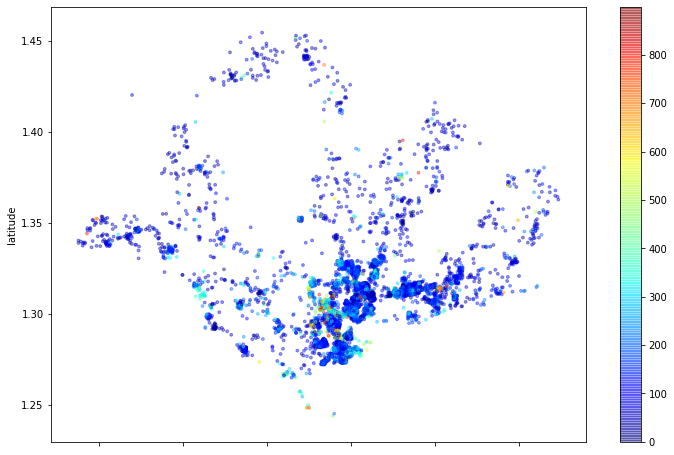

In [0]:
# plot the properties by latitude and longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8))

### **Conclusions**
Through this study, we did a basic exploration of the Airbnb data for Singapore. Using **Python** libraries, it was possible to explore the variables distribution, identify outliers, classify neighbourhoods according to prices and visualize it on the map. 

We discovered that, in this Asian technological hub, the areas with higher rental prices are the ones located on the Central Area and Southern Islands, which comprise business and touristical activities.

Further analysis can be done using a greater range of libraries and exploring the complete database, which includes 106 variables. 